# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta

# Importing Data

In [3]:
with open('new_clean_data.pkl', 'rb') as file:
    df = pickle.load(file)

In [4]:
# adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,video_id,channel_id,title,description,tags,caption,licensed_content,view_count,like_count,comment_count,channel_name,subscribers,total_views,total_videos,playlist_id,category,duration_formatted,published_at_formatted,no_of_tags,title_length,description_length
0,3fqTNzXY5tg,UCvZnwzmc3m1Eush-Or8Z6DA,Using Code and GPT-3 to Learn Faster,Thanks to ProjectPro.io for their support: htt...,[],True,True,6871,184,23,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:18:06,2023-02-19 14:00:02,0,36,795
1,bgVu5WVR9SE,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3723,184,9,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:29:22,2022-11-04 03:32:38,0,53,1475
2,4we3smhjAB8,UCvZnwzmc3m1Eush-Or8Z6DA,How Data Science ACTUALLY Works,Check out Deepnote for the easiest way to prac...,[],True,True,85152,2647,136,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:50,2022-11-01 16:30:09,0,31,1205
3,lpF5SSgczeE,UCvZnwzmc3m1Eush-Or8Z6DA,Does Instagram think you live in an influentia...,Request this and many other datasets @: https:...,[],True,True,4470,158,12,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 01:24:08,2022-10-25 14:00:07,0,81,1059
4,cRVM-LTe3fI,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3078,104,4,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:55,2022-10-07 03:36:26,0,53,1475


# EDA

In [6]:
# create time delta to check videos posted in last 30days
now = datetime.now()

one_month_ago = now - timedelta(days=30)

one_month_ago

datetime.datetime(2023, 11, 23, 10, 19, 42, 62524)

In [7]:
# create df of videos a month old
df_one_month_ago = df[df['published_at_formatted'] >= one_month_ago]

In [8]:
# create df of videos only a minute long
min_vid_time = timedelta(seconds=60)

df_oneminvid = df[df['duration_formatted'] <= min_vid_time]

In [9]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,9322.00,9322.00,9322.00,9322.00,9322.00,9322.00,9322,9322.00,9322.00,9322.00
mean,41207.70,950.78,54.35,448648.02,37438378.55,1079.89,0 days 00:31:00.894121433,12.26,62.53,2109.46
std,161115.87,3091.49,162.94,346890.26,31298157.33,721.74,0 days 00:57:43.756530145,8.71,21.65,1204.35
min,0.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:00:00,0.00,4.00,0.00
25%,1811.50,38.00,2.00,155000.00,8740951.00,303.00,0 days 00:04:11,5.00,46.00,1114.25
50%,6974.50,177.50,12.00,255000.00,22950468.00,1532.00,0 days 00:10:59,11.00,60.00,2093.00
75%,24418.25,638.00,47.00,809000.00,63094287.00,1758.00,0 days 00:40:55.500000,20.00,81.00,2921.00
max,7615207.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.00,109.00,5000.00


In [10]:
df_one_month_ago.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,134.00,134.00,134.00,134.00,134.00,134.00,134,134.00,134.00,134.00
mean,10767.30,426.22,18.46,258408.21,21644927.10,802.55,0 days 00:20:05.910447761,7.69,65.04,1151.05
std,18359.73,701.35,26.66,296917.88,27096702.08,633.04,0 days 00:36:36.132545483,7.96,20.38,1057.18
min,0.00,0.00,0.00,29300.00,1588707.00,58.00,0 days 00:00:00,0.00,20.00,0.00
25%,384.00,13.25,1.00,61900.00,4258081.00,274.00,0 days 00:00:56.250000,0.00,49.00,91.00
50%,3361.50,185.50,7.00,106000.00,5737808.00,576.00,0 days 00:06:26,6.00,65.50,1030.50
75%,13064.50,544.75,26.00,211000.00,22950468.00,1532.00,0 days 00:25:45.250000,8.75,81.00,1939.75
max,125592.00,5051.00,131.00,1060000.00,86329667.00,1857.00,0 days 04:34:24,38.00,100.00,4434.00


In [11]:
df_oneminvid.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,818.00,818.00,818.00,818.00,818.00,818.00,818,818.00,818.00,818.00
mean,44427.59,777.40,17.46,246577.02,17595233.87,572.31,0 days 00:00:39.367970660,10.76,50.05,1253.12
std,314251.60,1839.45,28.06,259381.01,21575692.28,521.90,0 days 00:00:16.154935311,9.59,18.86,1027.15
min,0.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:00:00,0.00,8.00,0.00
25%,2623.75,82.00,3.00,61900.00,4258081.00,286.00,0 days 00:00:28,0.00,37.00,231.00
50%,7963.00,293.50,8.50,185000.00,9376789.00,308.00,0 days 00:00:42,8.00,47.00,1420.00
75%,16805.00,718.75,20.00,220000.00,14481229.00,576.00,0 days 00:00:54,20.00,59.00,1948.00
max,7615207.00,23776.00,251.00,1060000.00,86329667.00,1857.00,0 days 00:01:00,33.00,100.00,3764.00


In [12]:
# drop videos upto a minute in duration, as youtube shorts are 60seconds, these videos have a large std, and include advertisement videos

df.drop(df[df['duration_formatted'] <= min_vid_time].index, inplace=True)

In [13]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,8504.00,8504.00,8504.00,8504.00,8504.00,8504.00,8504,8504.0,8504.00,8504.00
mean,40897.98,967.45,57.90,468085.23,39347091.20,1128.72,0 days 00:33:56.106773283,12.4,63.73,2191.83
std,137716.37,3185.67,169.95,348049.79,31425469.48,719.50,0 days 00:59:37.970832538,8.6,21.52,1187.98
min,4.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:01:01,0.0,4.00,0.00
25%,1748.25,35.00,2.00,155000.00,8740951.00,303.00,0 days 00:05:15,5.0,47.00,1226.75
50%,6837.50,167.00,12.00,256000.00,22950468.00,1532.00,0 days 00:12:55,11.0,62.00,2161.00
75%,25663.75,626.00,52.00,809000.00,63094287.00,1758.00,0 days 00:47:25.750000,20.0,82.25,2993.25
max,3291420.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.0,109.00,5000.00


In [14]:
# check how many videos are recently uploaded and how they are distributed
one_week_ago = now - timedelta(weeks=2, days=1)

one_week_ago

df_one_week_ago = df[df['published_at_formatted'] >= one_week_ago]

df_one_week_ago.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,35.00,35.00,35.00,35.00,35.00,35.0,35,35.00,35.00,35.00
mean,7130.91,275.97,20.31,396197.14,33508339.17,970.8,0 days 00:32:07.028571428,10.57,64.26,1836.66
std,10484.69,416.72,27.01,354966.64,31972923.52,719.7,0 days 00:46:51.565541344,9.46,22.43,960.60
min,95.00,1.00,0.00,29300.00,1588707.00,58.0,0 days 00:01:50,0.00,20.00,0.00
25%,261.00,7.50,1.00,103500.00,4966386.00,270.0,0 days 00:08:20,2.50,48.00,1143.00
50%,815.00,40.00,4.00,171000.00,22950468.00,576.0,0 days 00:17:37,8.00,63.00,1930.00
75%,12076.50,423.50,41.00,809000.00,63094287.00,1758.0,0 days 00:36:47,20.00,82.50,2568.50
max,46569.00,1875.00,104.00,1060000.00,86329667.00,1857.0,0 days 04:34:24,29.00,100.00,4434.00


In [15]:
# drop recently uploaded videos as not enough time to collect view data
df.drop(df[df['published_at_formatted'] >= one_week_ago].index, inplace=True)

In [16]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,8469.00,8469.00,8469.00,8469.00,8469.00,8469.00,8469,8469.00,8469.00,8469.00
mean,41037.53,970.31,58.06,468382.32,39371221.12,1129.37,0 days 00:33:56.557562876,12.41,63.73,2193.30
std,137981.93,3191.82,170.28,348011.48,31422856.52,719.47,0 days 00:59:40.921614871,8.60,21.52,1188.66
min,4.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:01:01,0.00,4.00,0.00
25%,1758.00,35.00,2.00,155000.00,8740951.00,303.00,0 days 00:05:14,5.00,47.00,1227.00
50%,6857.00,167.00,12.00,256000.00,22950468.00,1532.00,0 days 00:12:54,11.00,62.00,2163.00
75%,25763.00,630.00,52.00,809000.00,63094287.00,1758.00,0 days 00:47:31,20.00,82.00,2996.00
max,3291420.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.00,109.00,5000.00


## Univariate Analysis

#### Continuous Columns

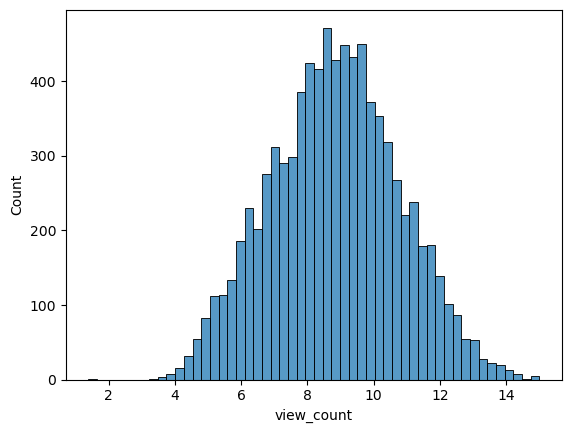

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


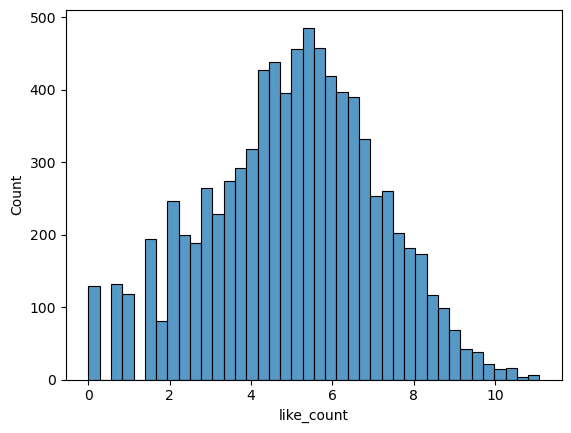

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


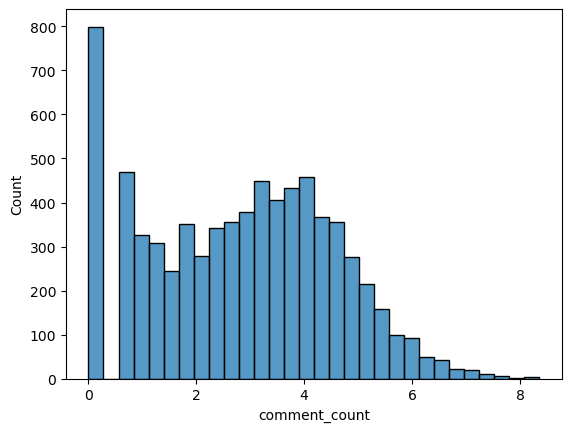

In [17]:
# scale the target data by getting the logarithim values of the views, for better visualisation
column_list = ['view_count', 'like_count', 'comment_count']
for column in column_list:
    log_data = np.log(df[column])
    sns.histplot(data=log_data)
    plt.show()

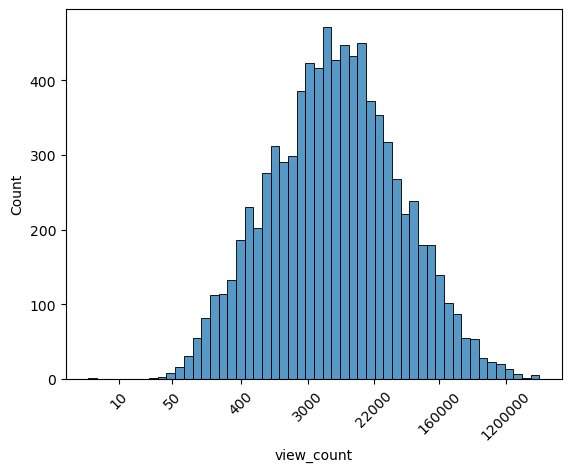

In [18]:
# convert view count back to the exponentiation values (original scale)

log_data = np.log(df['view_count'])
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [10, 50, 400, 3000, 22000, 160000, 1200000]  # Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

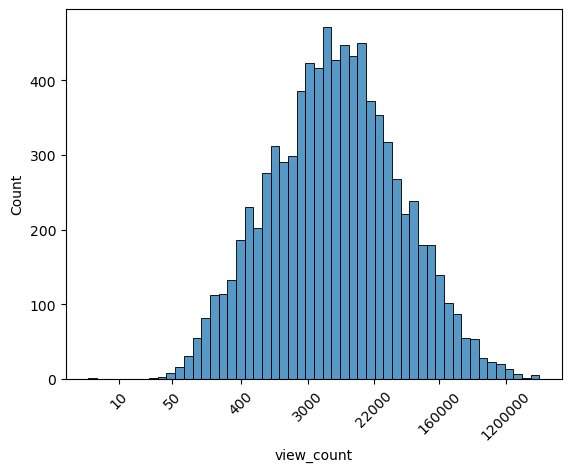

In [19]:
# convert view count back to the exponentiation values (original scale)

log_data = np.log(df['view_count'])
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [10, 50, 400, 3000, 22000, 160000, 1200000]  # Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

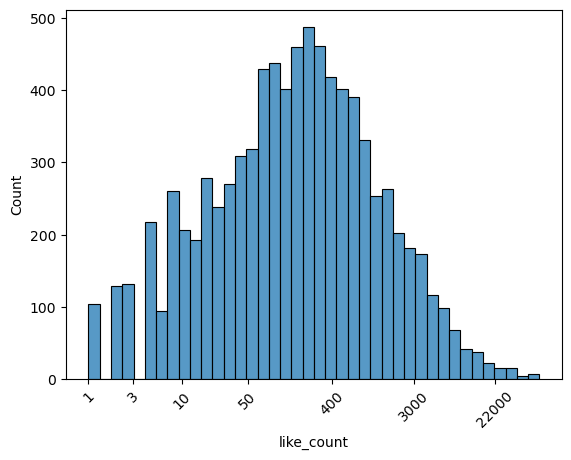

In [20]:
# convert like count back to the exponentiation values (original scale)

log_data = np.log(df['like_count'] + 1) ## added 1 to offset 0 division
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [1, 3, 10, 50, 400, 3000, 22000]
exp_ticks = np.exp(plt.xticks()[0])
# Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

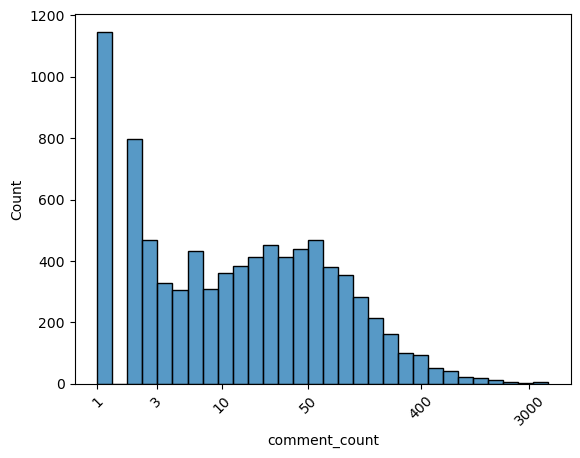

In [21]:
# convert comment count back to the exponentiation values (original scale)

log_data = np.log(df['comment_count'] + 1) ## added one to offset 0 division 
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [1, 3, 10, 50, 400, 3000]
exp_ticks = np.exp(plt.xticks()[0])
# Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

In [22]:
df.describe().columns

Index(['view_count', 'like_count', 'comment_count', 'subscribers',
       'total_views', 'total_videos', 'duration_formatted', 'no_of_tags',
       'title_length', 'description_length'],
      dtype='object')

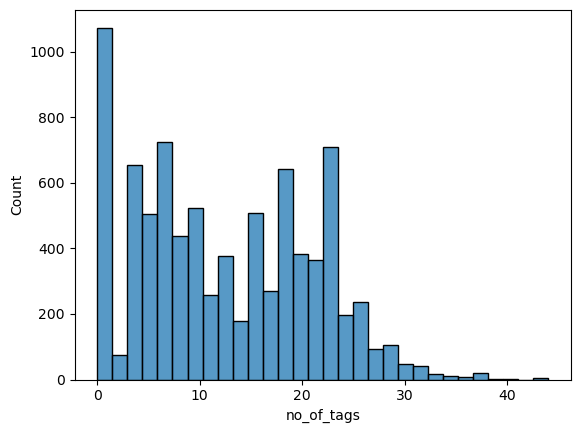

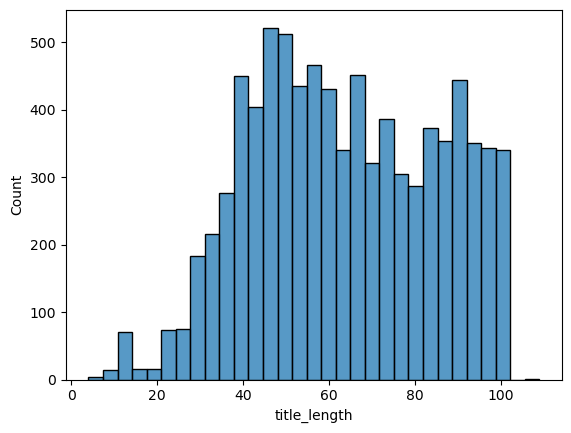

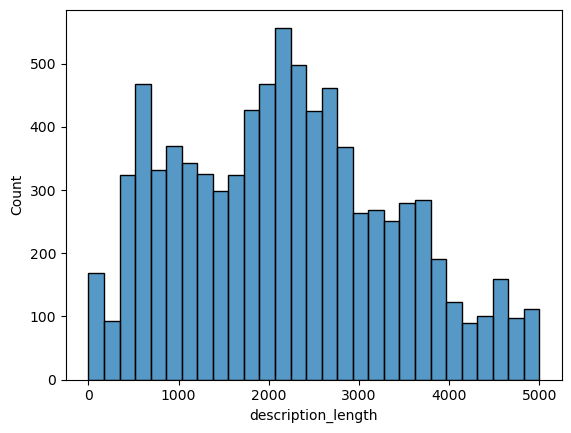

In [23]:
# duration needs to be formatte to minutes for distribution visuals
columns_list = ['no_of_tags', 'title_length', 'description_length']
for column in columns_list:
    sns.histplot(data=df[column])
    plt.show()

In [24]:
# convert timedelta values to respective minutes 
df['duration_minutes'] = df['duration_formatted'].apply(lambda x: round(x.total_seconds() / 60))

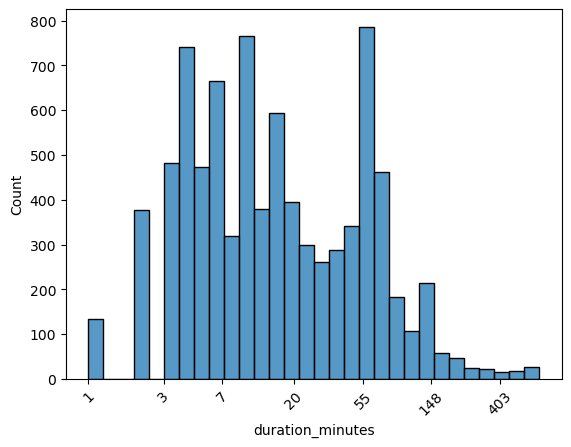

In [25]:
# convert duration_minutes back to the exponentiation values (original scale)

log_data = np.log(df.duration_minutes)
sns.histplot(log_data)

original_ticks = np.exp(plt.xticks()[0])
custom_ticks = [1, 3, 7, 20, 55, 148, 403]
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

#### Categorical Columns

In [26]:
df.columns

Index(['video_id', 'channel_id', 'title', 'description', 'tags', 'caption',
       'licensed_content', 'view_count', 'like_count', 'comment_count',
       'channel_name', 'subscribers', 'total_views', 'total_videos',
       'playlist_id', 'category', 'duration_formatted',
       'published_at_formatted', 'no_of_tags', 'title_length',
       'description_length', 'duration_minutes'],
      dtype='object')

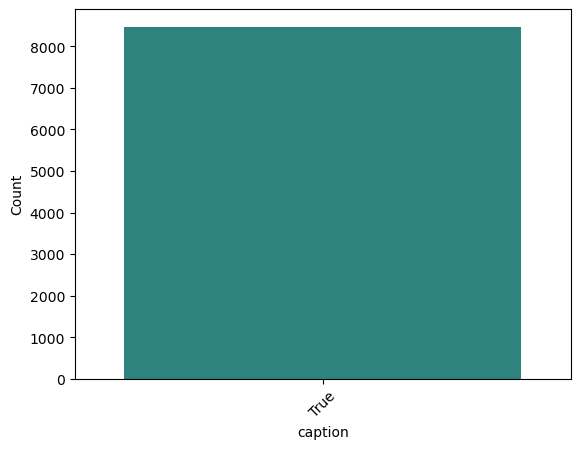

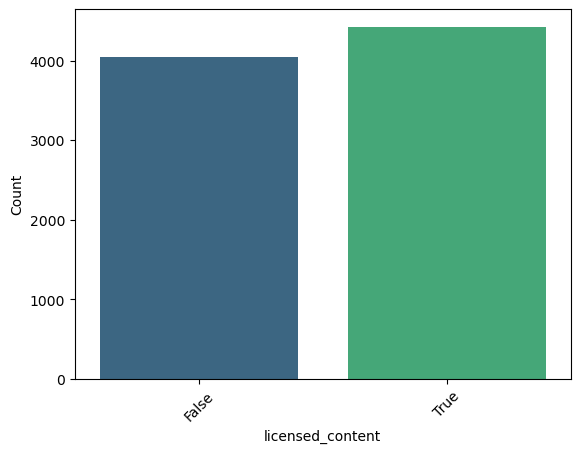

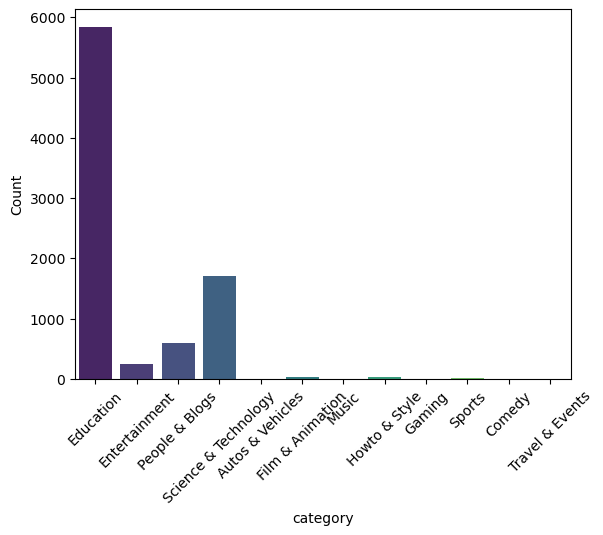

In [27]:
# list categorical columns
cat_columns = ['caption', 'licensed_content', 'category']

# create countplots for all categorical columns
for column in cat_columns:

    sns.countplot(data=df, x=column, palette='viridis')

    plt.xlabel(column)
    plt.ylabel('Count')

    plt.xticks(rotation=45)

    plt.show()

#### Tag column

In [28]:
df['tags'].tail()

9317    [Data Analyst, How to become a data analyst, D...
9318    [Data Analyst, How to become a Data Analyst, B...
9319    [Data Analyst Salary, Data analyst with no exp...
9320    [Working at a big company, Big company data an...
9321    [Top skills for data analyst, Top 3 skills for...
Name: tags, dtype: object

In [29]:
# explode list of tags in eac row
# merge similar tags
# case and whitespace check
# use set() and lower()


In [35]:
df.tail()

,video_id,channel_id,title,description,tags,caption,licensed_content,view_count,like_count,comment_count,channel_name,subscribers,total_views,total_videos,playlist_id,category,duration_formatted,published_at_formatted,no_of_tags,title_length,description_length,duration_minutes
9317,4rfr6A3lO-Y,UC7cs8q-gJRlGwj4A8OmCmXg,Data Analyst Resume | Reviewing My Resume! | F...,Data Analyst Resume | Reviewing My Resume! | F...,"[Data Analyst, How to become a data analyst, D...",True,True,66316,1574,64,Alex The Analyst,647000,27519398,270,UU7cs8q-gJRlGwj4A8OmCmXg,Education,0 days 00:07:33,2020-01-30 14:07:55,15,69,1875,8
9318,OTq2NRy_AGs,UC7cs8q-gJRlGwj4A8OmCmXg,Working at a Big Company Vs Small Company | To...,Working at a Big Company Vs Small Company | To...,"[Data Analyst, How to become a Data Analyst, B...",True,True,14527,397,20,Alex The Analyst,647000,27519398,270,UU7cs8q-gJRlGwj4A8OmCmXg,People & Blogs,0 days 00:05:50,2020-01-25 16:38:39,17,78,1548,6
9319,ya28cb3zFGE,UC7cs8q-gJRlGwj4A8OmCmXg,Data Analyst Salary | 100k with No Experience,Data Analyst Salary | 100k with No Experience ...,"[Data Analyst Salary, Data analyst with no exp...",True,True,62166,2153,227,Alex The Analyst,647000,27519398,270,UU7cs8q-gJRlGwj4A8OmCmXg,People & Blogs,0 days 00:05:03,2020-01-23 03:16:09,14,45,1979,5
9320,Hsi2BG0SOiQ,UC7cs8q-gJRlGwj4A8OmCmXg,Truth About Big Companies | Told by a Fortune ...,Truth About Big Companies // There are a ton o...,"[Working at a big company, Big company data an...",True,True,8157,305,18,Alex The Analyst,647000,27519398,270,UU7cs8q-gJRlGwj4A8OmCmXg,People & Blogs,0 days 00:05:45,2020-01-21 03:52:15,7,62,1589,6
9321,6lQzbk6_OTw,UC7cs8q-gJRlGwj4A8OmCmXg,Top 3 Data Analyst Skills in 2020,Top 3 Data Analyst Skills in 2020 // There are...,"[Top skills for data analyst, Top 3 skills for...",True,True,27814,1365,138,Alex The Analyst,647000,27519398,270,UU7cs8q-gJRlGwj4A8OmCmXg,People & Blogs,0 days 00:02:40,2020-01-17 14:31:39,8,33,1524,3


In [72]:
# store unique tag count across df
unique_tag_count = {}

# iterate through unique tags and map their count
for tag_list in df['tags']:

    for tag in tag_list:
        if tag.lower() in unique_tag_count:
            unique_tag_count[tag.lower()] += 1
        else:
            unique_tag_count[tag.lower()] = 1

# sort unique tag count in descending order
unique_tag_count = dict(sorted(unique_tag_count.items(), key=lambda item: item[1], reverse=True))

# find out how many unique tags we have
print(len(unique_tag_count))

# create data frame of tags data
df_tags = pd.DataFrame((list(unique_tag_count.items())[:10])).rename(columns={0: 'tags', 1: 'count'})

31878


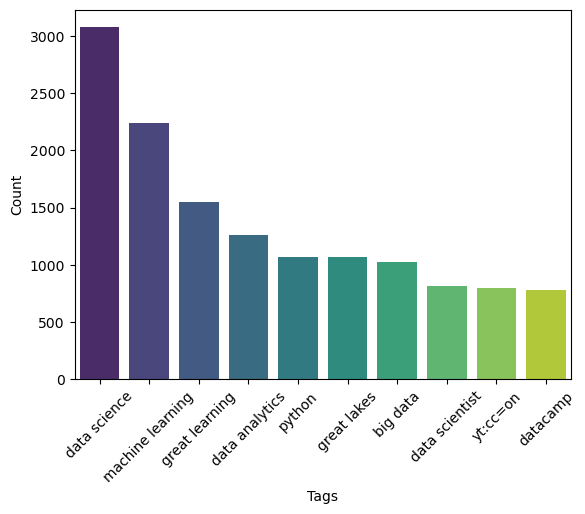

In [66]:
sns.barplot(data=df_tags, x='tags', y='count', palette='viridis')

plt.xlabel('Tags')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

## Bivariate Analysis

#### Continuous Columns

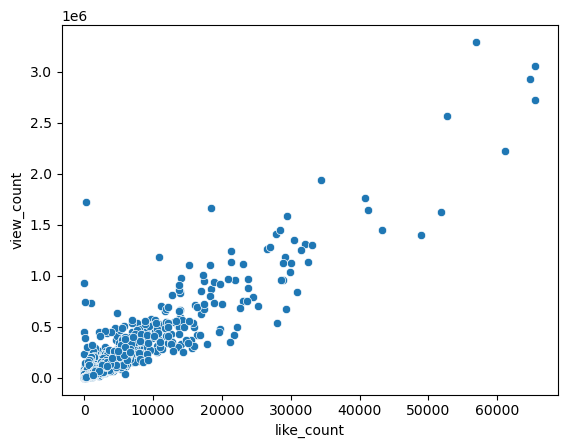

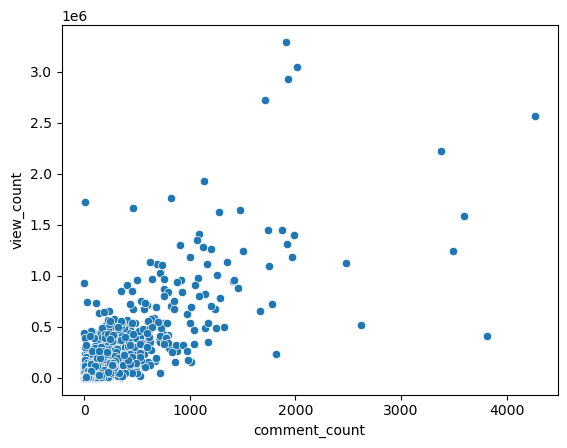

In [76]:
target = 'view_count' 

con_columns = ['like_count', 'comment_count']

for column in con_columns:

    sns.scatterplot(data=df, x=column, y=target)

    plt.xlabel(column)
    plt.ylabel(target)

    plt.show()


#### Catergorical Columns

C:\Users\mms\AppData\Local\Temp\ipykernel_9816\702445654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['log_target'] = np.log(df['view_count'])


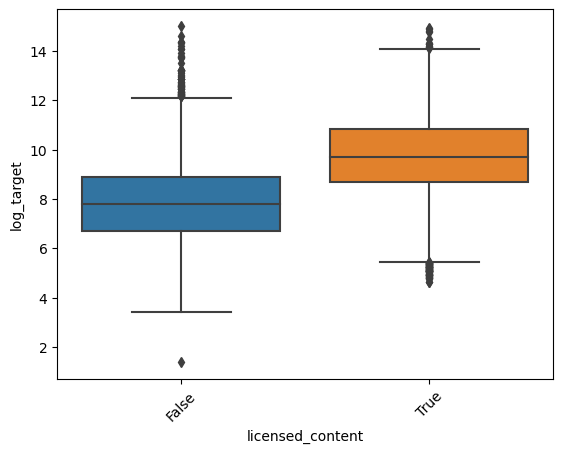

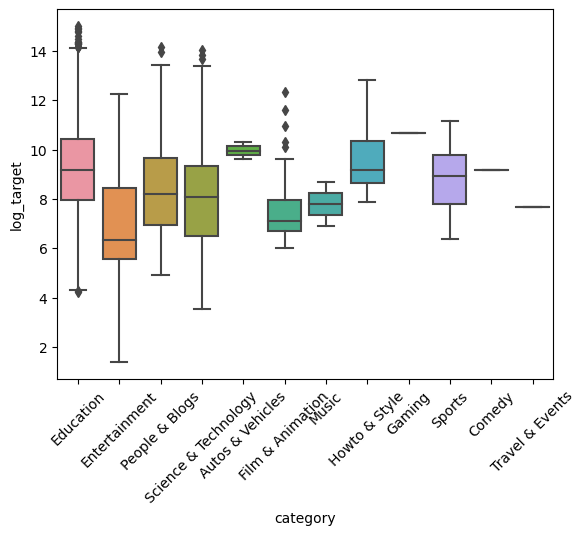

In [83]:
# list categorical columns
cat_columns = ['licensed_content', 'category']

cat_df = df[['licensed_content', 'category']]

cat_df['log_target'] = np.log(df['view_count'])

cat_df

for column in cat_columns:


    sns.boxplot(data=cat_df, x=column, y='log_target')

    plt.xlabel(column)
    plt.ylabel('log_target')

    plt.xticks(rotation=45)

    plt.show()

In [80]:
df.view_count

0        6871
1        3723
2       85152
3        4470
4        3078
        ...  
9317    66316
9318    14527
9319    62166
9320     8157
9321    27814
Name: view_count, Length: 8469, dtype: int64